# Data Wrangling of COVID-19
15 March 2020

Cecilia García López de Munain

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pickle

## Parameters

In [2]:
sys.path.append('./')

In [3]:
PATH_ROOT_INPUT_DATA = 'data\\input\\COVID-19-master\\archived_data\\archived_daily_case_updates'

PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME = 'covid_19_fulldata.pkl'

In [4]:
files = []
for r, d, f in os.walk(PATH_ROOT_INPUT_DATA):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))

dfs_list = []            
for file in files:
    df = pd.read_csv(os.path.join(file))
    dfs_list.append(df)
    
covid19_full_data = pd.concat(dfs_list, axis=0, ignore_index=True, sort=True)

In [5]:
covid19_full_data.head()

,Confirmed,ConfnSusp,Country/Region,Deaths,Last Update,Notes,Province/State,Recovered,Suspected
0,NaN,NaN,Mainland China,NaN,1/21/2020 10pm,NaN,Anhui,NaN,3.0
1,10.0,NaN,Mainland China,NaN,1/21/2020 10pm,NaN,Beijing,NaN,NaN
2,5.0,NaN,Mainland China,NaN,1/21/2020 10pm,NaN,Chongqing,NaN,NaN
3,17.0,NaN,Mainland China,NaN,1/21/2020 10pm,NaN,Guangdong,NaN,4.0
4,NaN,NaN,Mainland China,NaN,1/21/2020 10pm,NaN,Guangxi,NaN,1.0


In [11]:
covid19_full_data.tail()

,Confirmed,ConfnSusp,Country/Region,Deaths,Last Update,Notes,Province/State,Recovered,Suspected
3034,1.0,NaN,US,0.0,2020-02-05 21:53:02,NaN,"Madison, WI",0.0,NaN
3035,1.0,NaN,US,0.0,2020-02-01 19:53:03,NaN,"Orange, CA",0.0,NaN
3036,1.0,NaN,US,0.0,2020-02-13 18:53:02,NaN,"San Antonio, TX",0.0,NaN
3037,1.0,NaN,US,0.0,2020-02-09 07:03:04,NaN,"Seattle, WA",1.0,NaN
3038,1.0,NaN,US,0.0,2020-02-01 19:43:03,NaN,"Tempe, AZ",0.0,NaN


In [40]:
# Change date format
covid19_full_data.loc[:,'Last Update'] = pd.to_datetime(covid19_full_data.loc[:,'Last Update'])

In [50]:
covid19_full_data.loc[:,'Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Taiwan', 'Japan', 'US',
       'South Korea', 'Thailand', 'Macau', 'Singapore ', 'Philippines',
       'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia',
       'France', 'Nepal', 'Malaysia ', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Singapore', 'United Arab Emirates',
       'Finland', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others'], dtype=object)

### Some Plotting for checks

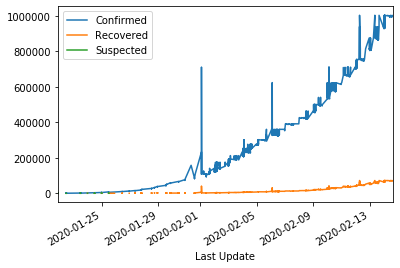

In [53]:
covid19_full_data[covid19_full_data.loc[:,'Country/Region'] == 'Mainland China'].loc[:,['Last Update','Confirmed','Recovered','Suspected']].set_index('Last Update').cumsum().plot()

## Export

In [45]:
with open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME), 'wb') as f:
    pickle.dump(covid19_full_data, f)